# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality
    sns.histplot(sample, kde=True)
    plt.title('Distribution of Sample Data')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()

    # Population mean (given)
    popmean = popmean

    # Sample mean (x̄) using NumPy mean()
    sample_mean = np.mean(sample)

    # Sample Standard Deviation (sigma) using Numpy
    sample_std = np.std(sample, ddof=1) # Use ddof=1 for sample standard deviation

    # Degrees of freedom
    dof = len(sample) - 1

    # Calculate the critical t-value for a two-tailed test
    critical_t = stats.t.ppf(1 - alpha/2, dof)


    # Calculate the t-value and p-value using scipy.stats.ttest_1samp
    t_statistic, p_value_two_tailed = stats.ttest_1samp(sample, popmean)


    print(f"T-statistic: {t_statistic:.4f}")
    print(f"Critical t-value (two-tailed): {critical_t:.4f}")
    print(f"P-value (two-tailed): {p_value_two_tailed:.4f}")

    # Determine if the results are significant for a two-tailed test
    # We reject the null if the absolute value of the t-statistic is greater than the critical t-value
    # OR if the two-tailed p-value is less than alpha
    if abs(t_statistic) > critical_t:
        print("Result: Significant (Reject Null Hypothesis)")
    else:
        print("Result: Not Significant (Fail to Reject Null Hypothesis)")

    # return results (optional, but can return t_statistic, critical_t, p_value_two_tailed)
    return t_statistic, critical_t, p_value_two_tailed

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

--- Results for Original Sample ---


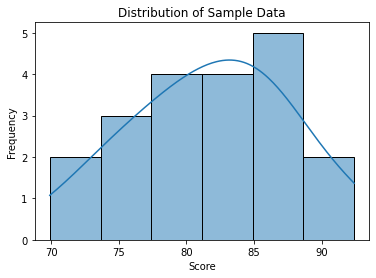

T-statistic: 12.6876
Critical t-value (two-tailed): 2.0930
P-value (two-tailed): 0.0000
Result: Significant (Reject Null Hypothesis)


(12.687592157174493, 2.093024054408263, 1.0053355594452825e-10)

In [2]:
# Original sample data
sample_scores_original = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1,
                                   78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])

popmean = 65
alpha = 0.05

print("--- Results for Original Sample ---")
one_sample_ttest(sample_scores_original, popmean, alpha)


## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 